# Data visualisations des ouragans

#### Préambule :

- Le National Hurricane Center NHC qui signifie "centre national des ouragans" analyse les tempêtes qui se forment dans le bassin atlantique (océan Atlantique nord - golfe du Mexique - mer des Caraïbes) afin d'étudier leur évolution.

- On rappelle que l'intensité du vent est mesurée avec l'échelle de Saffir-Simpson

#### Fichiers mis à disposition :

- 'ouragans.csv' contient le nom de la tempête, le moment du relevé, l'état dans lequel ça s'est produit, la latitude et la longitude, la vitesse et la catégorie du vent, la vitesse max et la catégorie max de la tempête.

- 'usa.json' contient le nom de chaque état des USA et l'ensemble des coordonnées GPS de ses frontières.

#### Objectifs :

- Comparer, par data visualisation, les ouragans de catégorie 5
- Représenter sur des cartes "dynamiques" les lieux de naissances des tempêtes et leurs déplacements.
- Etudier la formation des tempêtes selon les variables 'cat_max' et 'mois'
- Déterminer les états des Etats-Unis les plus impactés par des tempêtes.
- Animer le déplacement de célèbres tempêtes.

## Etape 1 : En coup de vent

In [1]:
import pandas as pd
import pylab as pl
pl.style.use('bmh')

T = pd.read_csv('data/ouragans.csv')

In [2]:
T.head()

,id,nom,tempete,annee,mois,jour,heure,etat,vent,lat,lon,cat,max,cat_max
0,AL011950,ABLE,ABLE / 1950,1950,8,12,0,vide,64.75,17.1,-55.5,0.0,203.5,3
1,AL011950,ABLE,ABLE / 1950,1950,8,12,600,vide,74.00,17.7,-56.3,0.0,203.5,3
2,AL011950,ABLE,ABLE / 1950,1950,8,12,1200,vide,83.25,18.2,-57.4,0.0,203.5,3
3,AL011950,ABLE,ABLE / 1950,1950,8,12,1800,vide,92.50,19.0,-58.6,0.0,203.5,3
4,AL011950,ABLE,ABLE / 1950,1950,8,13,0,vide,92.50,20.0,-60.0,0.0,203.5,3


In [3]:
T.tail()

,id,nom,tempete,annee,mois,jour,heure,etat,vent,lat,lon,cat,max,cat_max
26883,AL122015,KATE,KATE / 2015,2015,11,12,1200,vide,101.75,41.3,-50.4,0.0,138.75,1
26884,AL122015,KATE,KATE / 2015,2015,11,12,1800,vide,101.75,41.9,-49.9,0.0,138.75,1
26885,AL122015,KATE,KATE / 2015,2015,11,13,0,vide,92.50,41.5,-49.2,0.0,138.75,1
26886,AL122015,KATE,KATE / 2015,2015,11,13,600,vide,83.25,40.8,-47.5,0.0,138.75,1
26887,AL122015,KATE,KATE / 2015,2015,11,13,1200,vide,83.25,40.7,-45.4,0.0,138.75,1


La première tempête est 'ABLE', son id est 'AL011950', elle est apparu le 12/08/1950 et sa catégorie max est 3.

La dernière est 'KATE', son id est 'AL122015', elle est apparu le 08/11/2015 et sa catégorie max est 1.

## Etape 2 : Comparaison des ouragans de catégorie 5 

In [18]:
T5 = T.query('cat_max == 5')
T5.head()

,id,nom,tempete,annee,mois,jour,heure,etat,vent,lat,lon,cat,max,cat_max
1362,AL041953,CAROL,CAROL / 1953,1953,8,28,600,vide,46.25,14.0,-20.5,0.0,259.0,5
1363,AL041953,CAROL,CAROL / 1953,1953,8,28,1200,vide,46.25,13.9,-21.6,0.0,259.0,5
1364,AL041953,CAROL,CAROL / 1953,1953,8,28,1800,vide,46.25,13.8,-22.8,0.0,259.0,5
1365,AL041953,CAROL,CAROL / 1953,1953,8,29,0,vide,46.25,13.7,-24.0,0.0,259.0,5
1366,AL041953,CAROL,CAROL / 1953,1953,8,29,600,vide,55.50,13.6,-25.3,0.0,259.0,5


#### Vents moyens

In [21]:
V = T5.groupby('tempete')['vent'].mean()
V

tempete
ALLEN / 1980      179.570652
ANDREW / 1992     136.793269
ANITA / 1977      133.200000
BEULAH / 1967     142.053571
CAMILLE / 1969    137.000000
CARLA / 1961      125.509804
CAROL / 1953      137.326923
DAVID / 1979      153.213636
DEAN / 2007       161.654762
EDITH / 1971       96.308824
EMILY / 2005      149.644444
FELIX / 2007      132.803571
GILBERT / 1988    143.091837
HATTIE / 1961     183.612500
HUGO / 1989       147.566406
ISABEL / 2003     184.681034
IVAN / 2004       150.263298
JANET / 1955      159.100000
KATRINA / 2005    137.117647
MITCH / 1998      116.692308
RITA / 2005       145.173611
WILMA / 2005      163.802083
Name: vent, dtype: float64

In [22]:
V.sort_values(ascending = False)

tempete
ISABEL / 2003     184.681034
HATTIE / 1961     183.612500
ALLEN / 1980      179.570652
WILMA / 2005      163.802083
DEAN / 2007       161.654762
JANET / 1955      159.100000
DAVID / 1979      153.213636
IVAN / 2004       150.263298
EMILY / 2005      149.644444
HUGO / 1989       147.566406
RITA / 2005       145.173611
GILBERT / 1988    143.091837
BEULAH / 1967     142.053571
CAROL / 1953      137.326923
KATRINA / 2005    137.117647
CAMILLE / 1969    137.000000
ANDREW / 1992     136.793269
ANITA / 1977      133.200000
FELIX / 2007      132.803571
CARLA / 1961      125.509804
MITCH / 1998      116.692308
EDITH / 1971       96.308824
Name: vent, dtype: float64

On a un classement des vents moyens des tempêtes de catégorie 5 et la tempête Isabel avait les vents moyens les plus puissants

In [26]:
L = V.sort_values(ascending=False).index

#### Data visualisation pour comparer

<AxesSubplot:xlabel='tempete', ylabel='vent'>

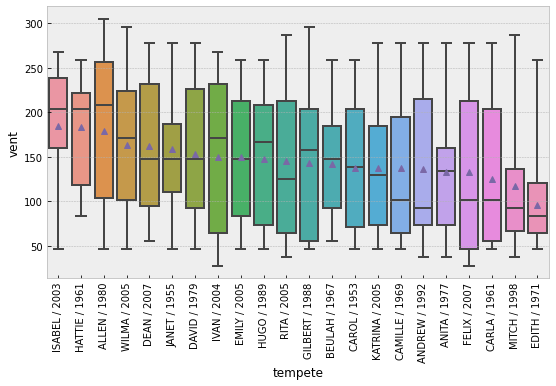

In [27]:
import seaborn as sns

fig, ax = pl.subplots(figsize=(9,5))
pl.xticks(rotation=90)
sns.boxplot(x='tempete', y='vent', 
            data=T5, whis = [0,100], 
            order = L, showmeans = True,
            ax=ax)

- La tempête qui a été le plus longtemps en catégorie 5 est ALLEN (car > 250km/h) 
- Les tempêtes les plus imprévisibles dans leurs intensités sont EDITH, ANITA et MITCH

## Etape 3 : Cartographie des routes et naissances des tempêtes

In [28]:
G = T.groupby('id').first()
G.head(3)

,nom,tempete,annee,mois,jour,heure,etat,vent,lat,lon,cat,max,cat_max
id,,,,,,,,,,,,,
AL011950,ABLE,ABLE / 1950,1950,8,12,0,vide,64.75,17.1,-55.5,0.0,203.50,3
AL011951,UNNAMED,UNNAMED / 1951,1951,1,2,1200,vide,92.50,30.5,-58.0,0.0,101.75,0
AL011952,UNNAMED,UNNAMED / 1952,1952,2,2,600,vide,46.25,18.5,-87.2,0.0,111.00,0


In [30]:
len(G)

989

Il y a 989 tempêtes qui se sont formés dans l'Atlantique.